In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
RENAME = {
    "Regularized RRE": "RNA",
    "RNA": "ARNA",
    "RNA+norm": "ARNA+norm",
    "RNA+ls": "ARNA+ls",
    "Epsilon inv": "VEA", 
    "Epsilon mult": "TEA", 
    "Topological epsilon": "STEA",
    "TEA": "TS",
    "TEA_rand": "TS, random",
}

LEVIN_RENAME = {
    "VJT": "VJT-7",
    "VJU": "VJU-7",
    "VJV": "VJV-7",
    "VST": "VJT-3",
    "VSU": "VJU-3",
    "VSV": "VJV-3",
}

In [3]:
df_old = pd.read_csv("results/sonar:k=6.csv", index_col=0) \
    .rename(RENAME, axis="columns")
df_new = pd.read_csv("results/sonar-new-methods:k=6.csv", index_col=0) \
    .rename(RENAME, axis="columns")

In [4]:
best = min(np.nanmin(df_old.values), np.nanmin(df_new.values))

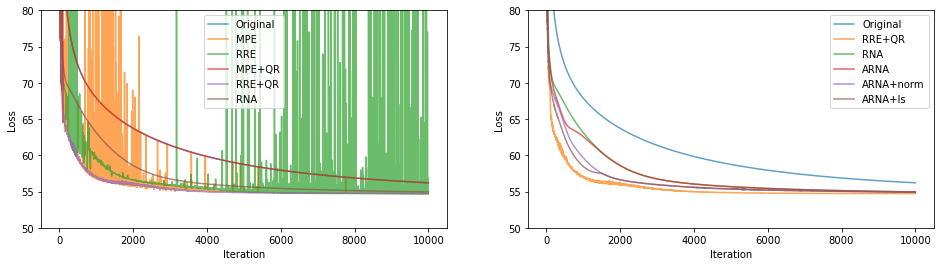

In [30]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
df1 = df_old[["Original", "MPE", "RRE", "MPE+QR", "RRE+QR", "RNA"]].iloc[:10000]
df2 = df_old[["Original", "RRE+QR", "RNA", "ARNA", "ARNA+norm", "ARNA+ls"]].iloc[:10000]
df1.plot(ax=ax[0], alpha=0.7)
df2.plot(ax=ax[1], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel("Loss")
    axis.set_ylim(50, 80)
fig.savefig("figures/sonar1.png")

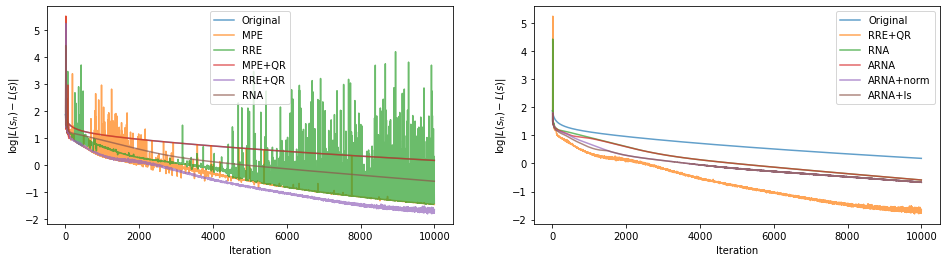

In [31]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
np.log10(df1 - best).plot(ax=ax[0], alpha=0.7)
np.log10(df2 - best).plot(ax=ax[1], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel(r"$\log|L(s_n)-L(s)|$")
fig.savefig("figures/sonar1-log.png")

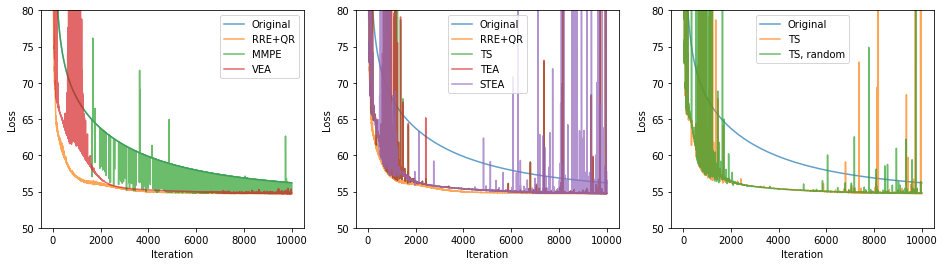

In [33]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 4), facecolor="white")
df1 = df_new[["Original", "RRE+QR", "MMPE", "VEA"]].iloc[:10000]
df2 = df_new[["Original", "RRE+QR", "TS", "TEA", "STEA"]].iloc[:10000]
df3 = df_new[["Original", "TS", "TS, random"]].iloc[:10000]
df1.plot(ax=ax[0], alpha=0.7)
df2.plot(ax=ax[1], alpha=0.7)
df3.plot(ax=ax[2], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel("Loss")
    axis.set_ylim(50, 80)
fig.savefig("figures/sonar2.png")

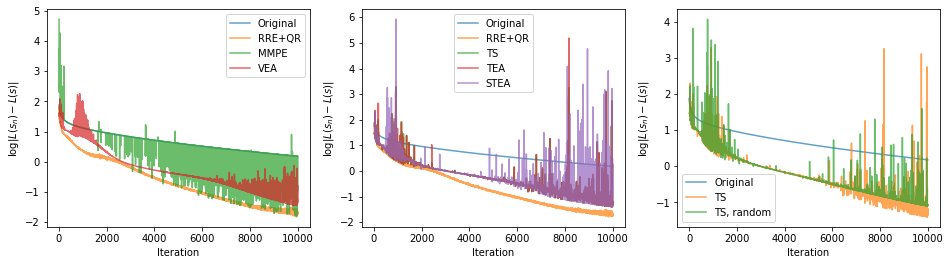

In [34]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 4), facecolor="white")
np.log10(df1 - best).plot(ax=ax[0], alpha=0.7)
np.log10(df2 - best).plot(ax=ax[1], alpha=0.7)
np.log10(df3 - best).plot(ax=ax[2], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel(r"$\log|L(s_n)-L(s)|$")
fig.savefig("figures/sonar2-log.png")

---

In [36]:
df_old = pd.read_csv("results/sonar-restarts:k=6.csv", index_col=0) \
    .rename(RENAME, axis="columns")
df_new = pd.read_csv("results/sonar-restarts-new-methods:k=6.csv", index_col=0) \
    .rename(RENAME, axis="columns")

In [37]:
best = min(np.nanmin(df_old.values), np.nanmin(df_new.values))

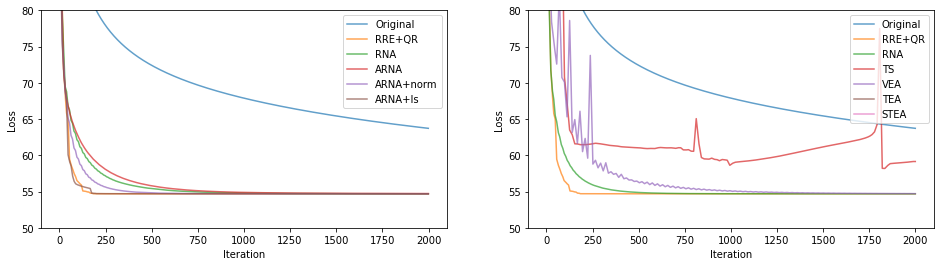

In [38]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
df1 = df_old.iloc[:2000].drop("RNA+cholesky", axis="columns").interpolate("linear")
df2 = df_new.iloc[:2000].drop(["MMPE", "MPE+QR"], axis="columns").interpolate("linear")
df1.plot(ax=ax[0], alpha=0.7)
df2.plot(ax=ax[1], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel("Loss")
    axis.set_ylim(50, 80)
fig.savefig("figures/sonar-restarts1.png")

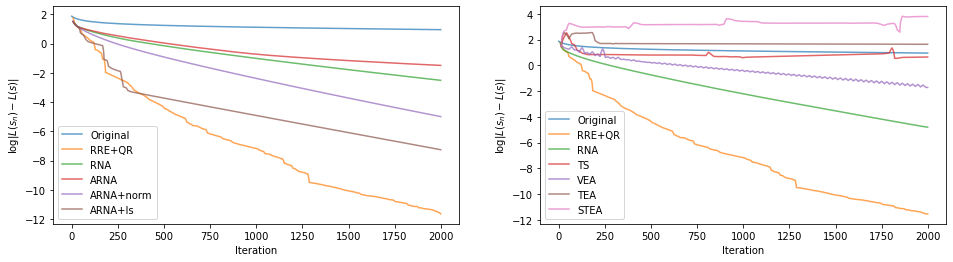

In [18]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
np.log10(df1 - best).plot(ax=ax[0], alpha=0.7)
np.log10(df2 - best).plot(ax=ax[1], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel(r"$\log|L(s_n)-L(s)|$")
fig.savefig("figures/sonar-restarts1-log.png")

---

In [3]:
df_base = pd.read_csv("results/sonar-levin.csv", index_col=0) \
    .rename(RENAME, axis="columns")
df_restarts = pd.read_csv("results/sonar-levin-restarts.csv", index_col=0) \
    .rename(RENAME, axis="columns")
df_new = pd.read_csv("results/sonar-levin_type.csv", index_col=0) \
    .rename(LEVIN_RENAME, axis="columns")

In [4]:
best = min(np.nanmin(df.values) for df in [df_base, df_restarts, df_new])

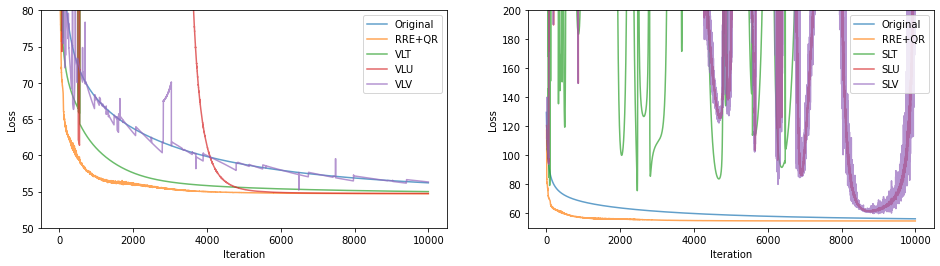

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
df1 = df_base[["Original", "RRE+QR", "VLT", "VLU", "VLV"]].iloc[:10000]
df2 = df_base[["Original", "RRE+QR", "SLT", "SLU", "SLV"]].iloc[:10000]
df1.plot(ax=ax[0], alpha=0.7)
df2.plot(ax=ax[1], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel("Loss")
ax[0].set_ylim(50, 80)
ax[1].set_ylim(50, 200)
fig.savefig("figures/sonar-levin1.png")

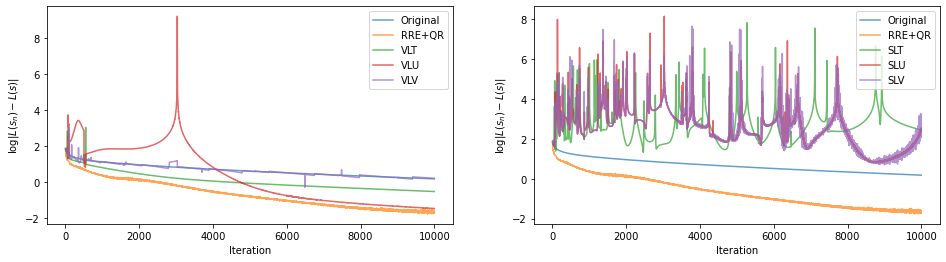

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
np.log10(df1 - best).plot(ax=ax[0], alpha=0.7)
np.log10(df2 - best).plot(ax=ax[1], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel(r"$\log|L(s_n)-L(s)|$")
fig.savefig("figures/sonar-levin1-log.png")

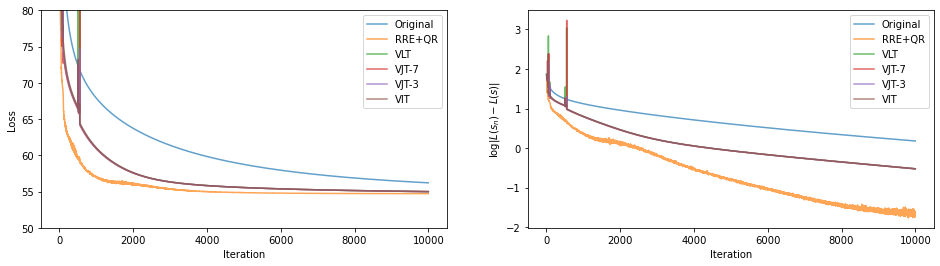

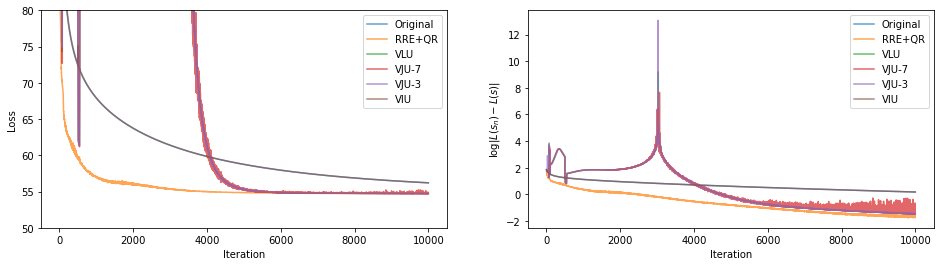

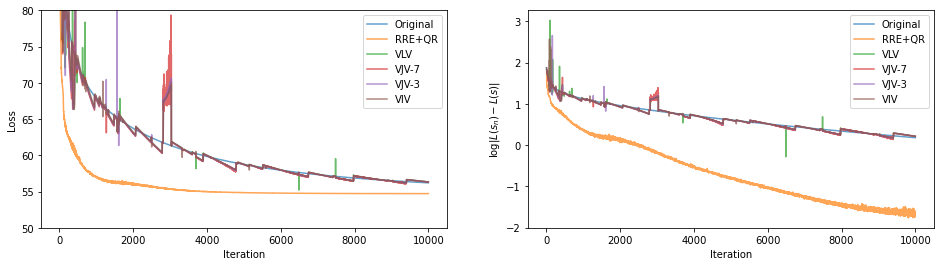

In [14]:
for t in "TUV":
    fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
    df = df_new.iloc[:10000][["Original", "RRE+QR"] + [c for c in df_new.columns if c[2] == t]]
    df.plot(ax=ax[0], alpha=0.7)
    np.log10(df - best).plot(ax=ax[1], alpha=0.7)
    for axis in ax.ravel():
        axis.set_xlabel("Iteration")
    ax[0].set_ylabel("Loss")
    ax[0].set_ylim(50, 80)
    ax[1].set_ylabel(r"$\log|L(s_n)-L(s)|$")
    fig.savefig(f"figures/sonar-levin-type:{t.lower()}.png")
    plt.show()

---

In [95]:
df_old1 = pd.read_csv("results/madelon:tau=1e2.csv", index_col=0) \
    .rename(RENAME, axis="columns")
df_old2 = pd.read_csv("results/madelon:tau=1e-3.csv", index_col=0) \
    .rename(RENAME, axis="columns")
df_new1 = pd.read_csv("results/madelon-new-methods:tau=1e2.csv", index_col=0) \
    .rename(RENAME, axis="columns")
df_new2 = pd.read_csv("results/madelon-new-methods:tau=1e-7.csv", index_col=0) \
    .rename(RENAME, axis="columns")

In [96]:
best1 = min(np.nanmin(df.values) for df in [df_old1, df_new1])
best2 = min(np.nanmin(df.values) for df in [df_old2, df_new2])

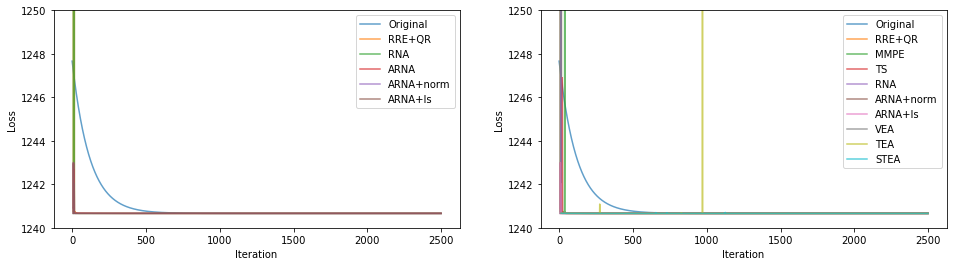

In [100]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
df1 = df_old1.iloc[:2500]#.drop("RNA+cholesky", axis="columns")
df2 = df_new1.iloc[:2500]#.drop(["MMPE", "MPE+QR"], axis="columns")
df1.plot(ax=ax[0], alpha=0.7)
df2.plot(ax=ax[1], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel("Loss")
    axis.set_ylim(1240, 1250)
fig.savefig("figures/madelon1.png")

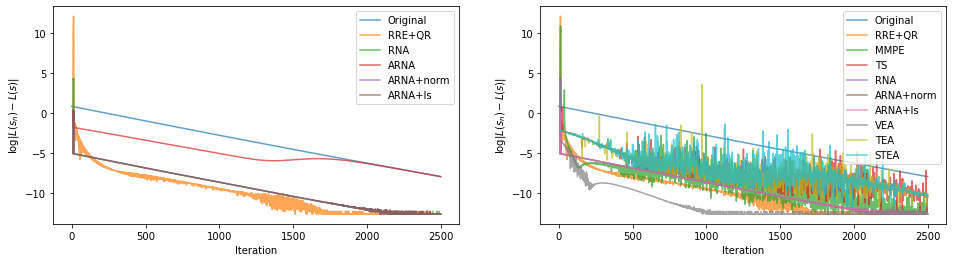

In [101]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
np.log10(df1 - best1).plot(ax=ax[0], alpha=0.7)
np.log10(df2 - best1).plot(ax=ax[1], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel(r"$\log|L(s_n)-L(s)|$")
fig.savefig("figures/madelon1-log.png")

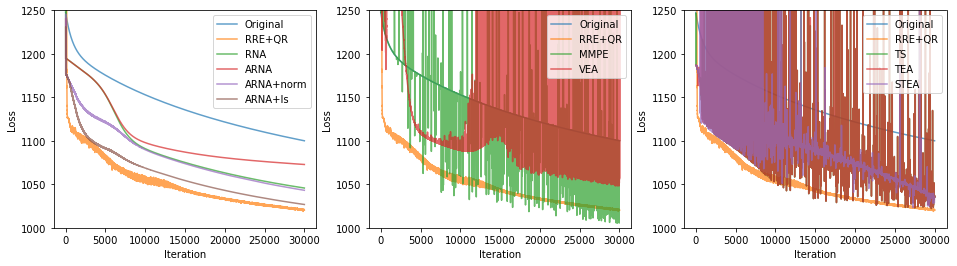

In [102]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 4), facecolor="white")
df1 = df_old2.iloc[:30000]
df2 = df_new2.iloc[:30000][["Original", "RRE+QR", "MMPE", "VEA"]]
df3 = df_new2.iloc[:30000][["Original", "RRE+QR", "TS", "TEA", "STEA"]]
df1.plot(ax=ax[0], alpha=0.7)
df2.plot(ax=ax[1], alpha=0.7)
df3.plot(ax=ax[2], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel("Loss")
    axis.set_ylim(1000, 1250)
fig.savefig("figures/madelon2.png")

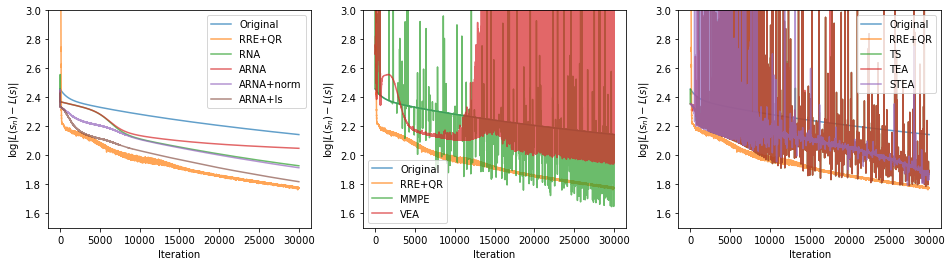

In [103]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 4), facecolor="white")
np.log10(df1 - best2).plot(ax=ax[0], alpha=0.7)
np.log10(df2 - best2).plot(ax=ax[1], alpha=0.7)
np.log10(df3 - best2).plot(ax=ax[2], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel(r"$\log|L(s_n)-L(s)|$")
    axis.set_ylim(1.5, 3)
fig.savefig("figures/madelon2-log.png")

In [104]:
df_old = pd.read_csv("results/madelon-restarts:tau=1e2.csv", index_col=0) \
    .rename(RENAME, axis="columns")
df_new = pd.read_csv("results/madelon-restarts-new-methods:tau=1e2.csv", index_col=0) \
    .rename(RENAME, axis="columns")

In [105]:
best = min(np.nanmin(df_old.values), np.nanmin(df_new.values))

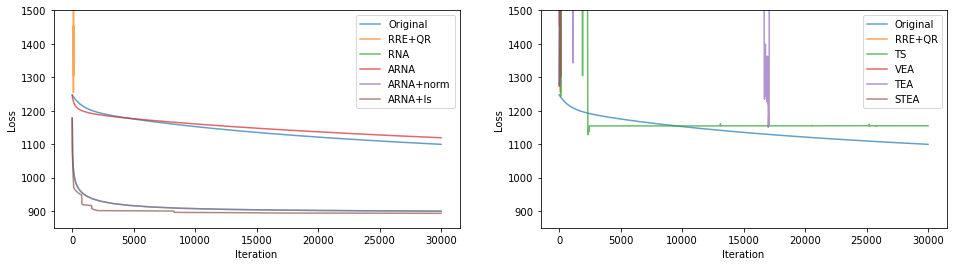

In [106]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
df1 = df_old.iloc[:30000].interpolate("linear")
df2 = df_new.iloc[:30000].drop(["RNA", "ARNA+norm", "ARNA+ls"], axis="columns").interpolate("linear")
df1.plot(ax=ax[0], alpha=0.7)
df2.plot(ax=ax[1], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel("Loss")
    axis.set_ylim(850, 1500)
fig.savefig("figures/madelon-restarts1.png")

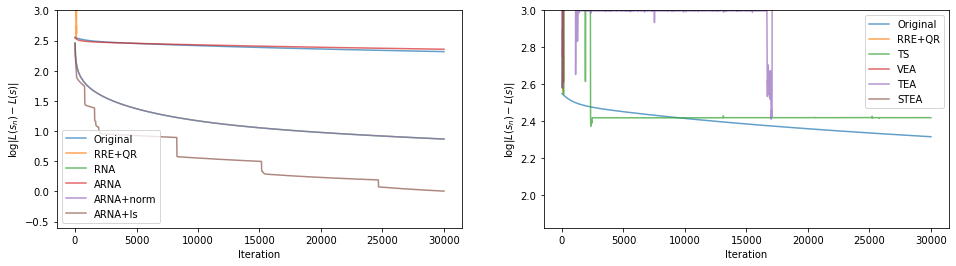

In [107]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
np.log10(df1 - best).plot(ax=ax[0], alpha=0.7)
np.log10(df2 - best).plot(ax=ax[1], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel(r"$\log|L(s_n)-L(s)|$")
    axis.set_ylim(None, 3)
fig.savefig("figures/madelon-restarts1-log.png")

In [3]:
df_base1 = pd.read_csv("results/madelon-levin:tau=1e2.csv", index_col=0) \
    .rename(RENAME, axis="columns")
df_base2 = pd.read_csv("results/madelon-levin:tau=1e-3.csv", index_col=0) \
    .rename(RENAME, axis="columns")
df_new = pd.read_csv("results/madelon-levin-type:tau=1e-3.csv", index_col=0) \
    .rename(LEVIN_RENAME, axis="columns")

In [4]:
best1 = np.nanmin(df_base1.values)
best2 = min(np.nanmin(df.values) for df in [df_base2, df_new])

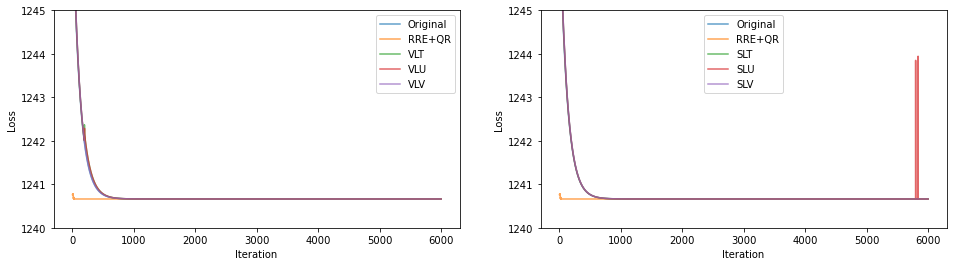

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
df1 = df_base1[["Original", "RRE+QR", "VLT", "VLU", "VLV"]].iloc[:6000]
df2 = df_base1[["Original", "RRE+QR", "SLT", "SLU", "SLV"]].iloc[:6000]
df1.plot(ax=ax[0], alpha=0.7)
df2.plot(ax=ax[1], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel("Loss")
    axis.set_ylim(1240, 1245)
fig.savefig("figures/madelon-levin1.png")

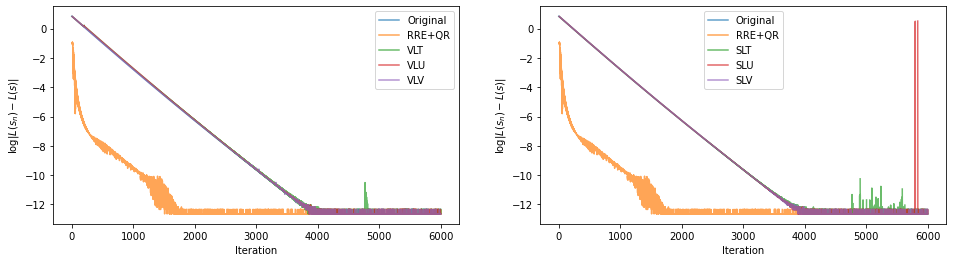

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
np.log10(df1 - best1).plot(ax=ax[0], alpha=0.7)
np.log10(df2 - best1).plot(ax=ax[1], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel(r"$\log|L(s_n)-L(s)|$")
fig.savefig("figures/madelon-levin1-log.png")

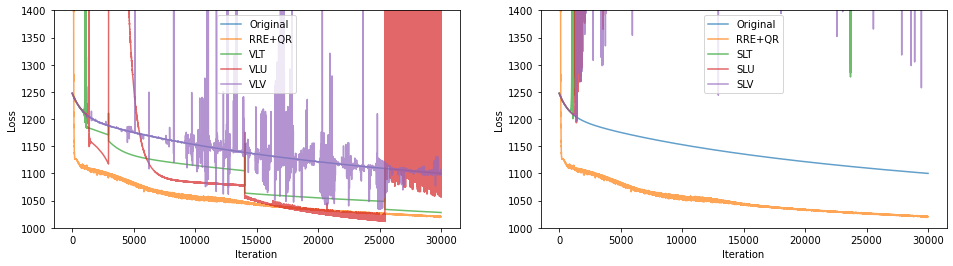

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
df1 = df_base2[["Original", "RRE+QR", "VLT", "VLU", "VLV"]].iloc[:30000]
df2 = df_base2[["Original", "RRE+QR", "SLT", "SLU", "SLV"]].iloc[:30000]
df1.plot(ax=ax[0], alpha=0.7)
df2.plot(ax=ax[1], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel("Loss")
    axis.set_ylim(1000, 1400)
fig.savefig("figures/madelon-levin2.png")

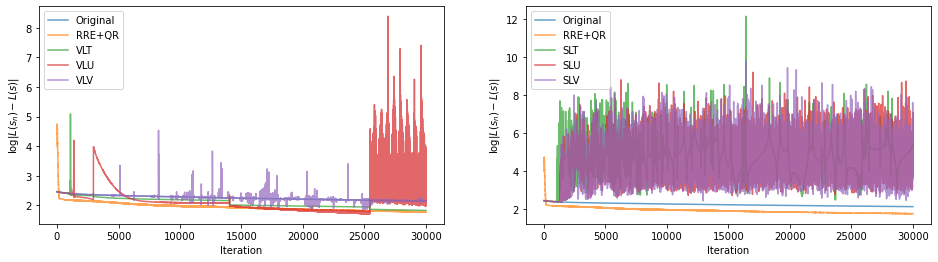

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
np.log10(df1 - best2).plot(ax=ax[0], alpha=0.7)
np.log10(df2 - best2).plot(ax=ax[1], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel(r"$\log|L(s_n)-L(s)|$")
fig.savefig("figures/madelon-levin2-log.png")

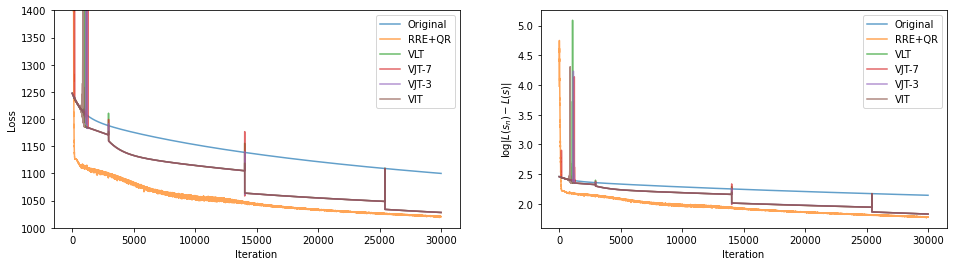

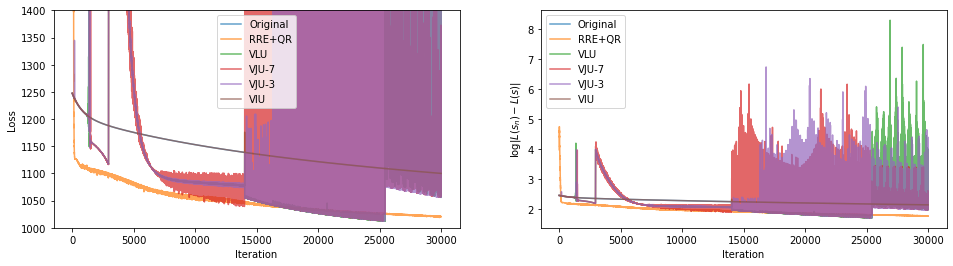

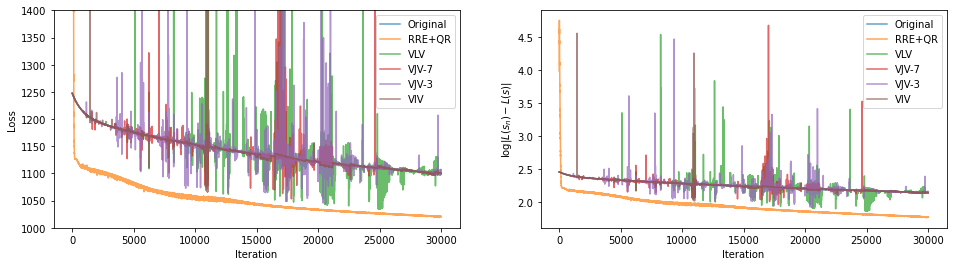

In [9]:
for t in "TUV":
    fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
    df = df_new.iloc[:30000][["Original", "RRE+QR"] + [c for c in df_new.columns if c[2] == t]]
    df.plot(ax=ax[0], alpha=0.7)
    np.log10(df - best2).plot(ax=ax[1], alpha=0.7)
    for axis in ax.ravel():
        axis.set_xlabel("Iteration")
    ax[0].set_ylabel("Loss")
    ax[1].set_ylabel(r"$\log|L(s_n)-L(s)|$")
    ax[0].set_ylim(1000, 1400)
    fig.savefig(f"figures/madelon-levin-type:{t.lower()}.png")
    plt.show()

---

In [28]:
df = pd.read_csv("results/sido0-new-methods.csv", index_col=0) \
    .rename(RENAME, axis="columns")

In [29]:
best = np.nanmin(df.values)

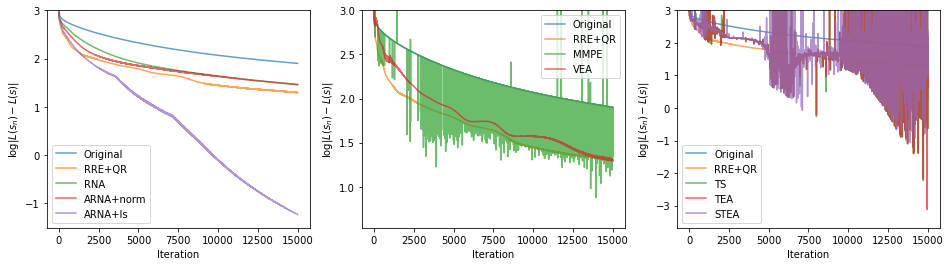

In [31]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 4), facecolor="white")
np.log10(df1 - best).plot(ax=ax[0], alpha=0.7)
np.log10(df2 - best).plot(ax=ax[1], alpha=0.7)
np.log10(df3 - best).plot(ax=ax[2], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel(r"$\log|L(s_n)-L(s)|$")
    axis.set_ylim(None, 3)
fig.savefig("figures/sido1-log.png")

In [32]:
df = pd.read_csv("results/sido0-levin.csv", index_col=0) \
    .rename(RENAME, axis="columns")

In [33]:
best = np.nanmin(df.values)

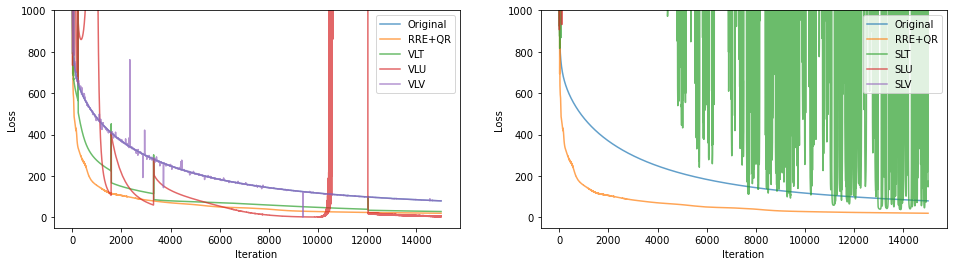

In [34]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
df1 = df[["Original", "RRE+QR", "VLT", "VLU", "VLV"]].iloc[:15000]
df2 = df[["Original", "RRE+QR", "SLT", "SLU", "SLV"]].iloc[:15000]
df1.plot(ax=ax[0], alpha=0.7)
df2.plot(ax=ax[1], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel("Loss")
    axis.set_ylim(-50, 1000)
fig.savefig("figures/sido-levin1.png")

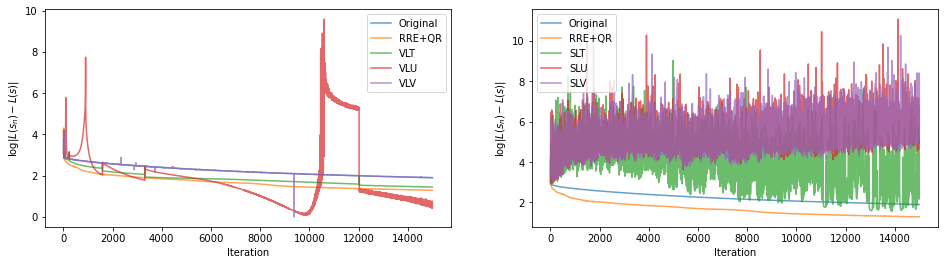

In [35]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
np.log10(df1 - best).plot(ax=ax[0], alpha=0.7)
np.log10(df2 - best).plot(ax=ax[1], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel(r"$\log|L(s_n)-L(s)|$")
fig.savefig("figures/sido-levin1-log.png")

---

In [124]:
df_k = pd.read_csv("results/sonar-k-test.csv", index_col=0)
df_k = df_k.drop(["VLT-30"] + [c for c in df_k.columns if "small_lambda" in c], axis="columns")    

In [125]:
best = np.nanmin(df.values)

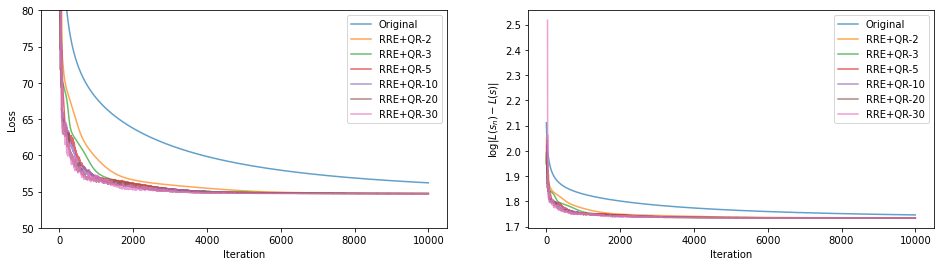

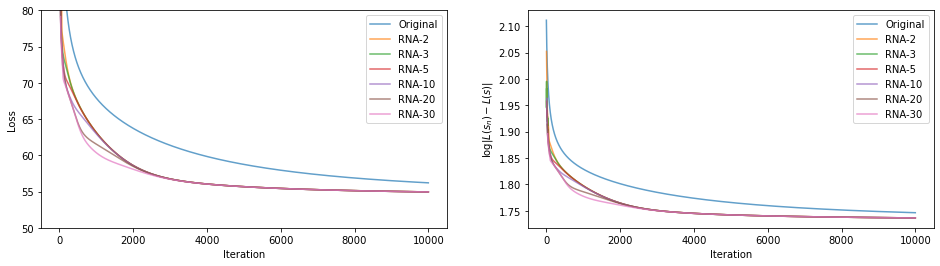

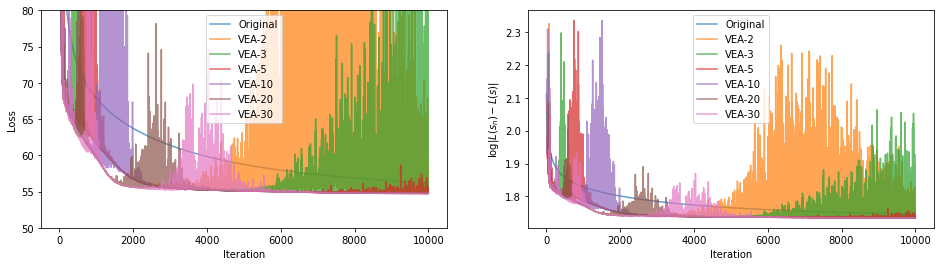

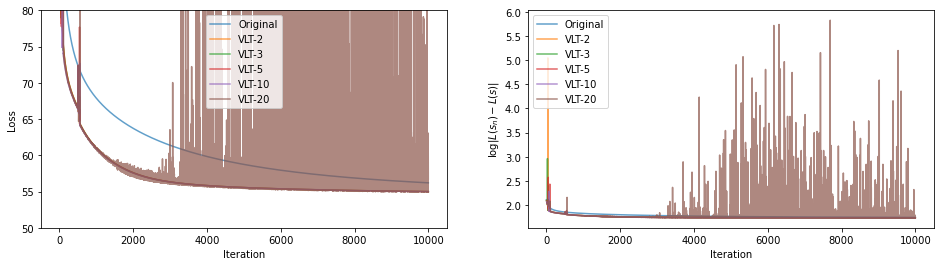

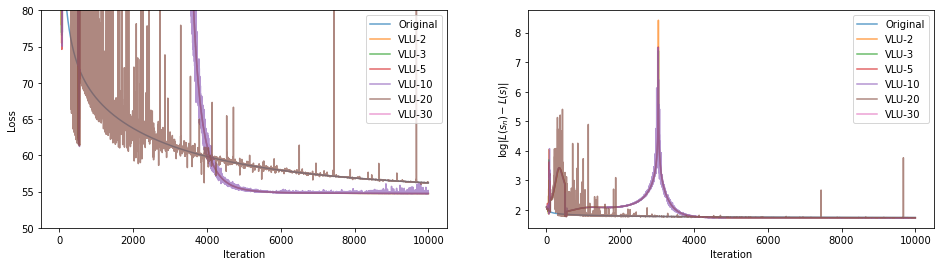

In [126]:
for method in ["RRE+QR", "RNA", "VEA", "VLT", "VLU"]:
    fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
    df = df_k[["Original"] + [c for c in df_k.columns if c.startswith(method)]].iloc[:10000]
    df.plot(ax=ax[0], alpha=0.7)
    np.log10(df - best).plot(ax=ax[1], alpha=0.7)
    for axis in ax.ravel():
        axis.set_xlabel("Iteration")
    ax[0].set_ylabel("Loss")
    ax[0].set_ylim(50, 80)
    ax[1].set_ylabel(r"$\log|L(s_n)-L(s)|$")
    fig.savefig(f"figures/sonar-k-test-{method.lower()}.png")

In [28]:
df_k = pd.read_csv("results/sonar-lambda-test.csv", index_col=0)

In [29]:
best = np.nanmin(df.values)

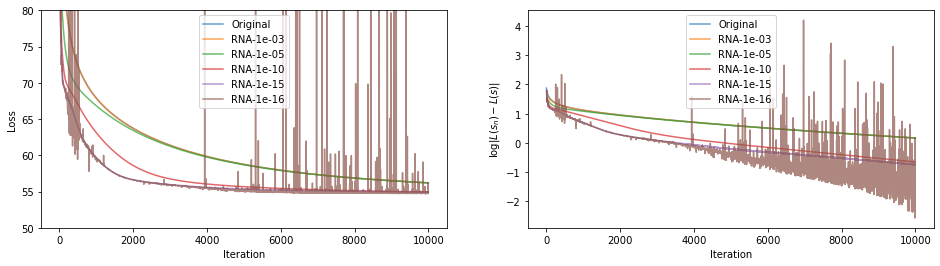

In [30]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
df = df_k[["Original"] + [f"RNA-{c:.0e}" for c in [1e-3, 1e-5, 1e-10, 1e-15, 1e-16]]].iloc[:10000]
df.plot(ax=ax[0], alpha=0.7)
np.log10(df - best).plot(ax=ax[1], alpha=0.7)
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
ax[0].set_ylabel("Loss")
ax[0].set_ylim(50, 80)
ax[1].set_ylabel(r"$\log|L(s_n)-L(s)|$")
fig.savefig(f"figures/sonar-lambda-test.png")

---

In [27]:
df = pd.read_csv("../nn/acceleration_results.csv", index_col=0)
def process(s):
    s = (s.replace("_", " ")
         .replace("train", "training")
         .replace("valid", "validation")
         .replace("vec eps", "VEA"))
    return s[0].upper() + s[1:]
renames = {c: process(c) for c in df.columns}
df = df.rename(renames, axis="columns")

In [28]:
for c in df.columns:
    print(c)

Training accuracy
Training loss
Validation accuracy
Validation loss
RNA training accuracy
RNA training loss
RNA validation accuracy
RNA validation loss
RNA2 training accuracy
RNA2 training loss
RNA2 validation accuracy
RNA2 validation loss
RRE training accuracy
RRE training loss
RRE validation accuracy
RRE validation loss
RRE2 training accuracy
RRE2 training loss
RRE2 validation accuracy
RRE2 validation loss
VEA training accuracy
VEA training loss
VEA validation accuracy
VEA validation loss
Levin t training accuracy
Levin t training loss
Levin t validation accuracy
Levin t validation loss
Levin t2 training accuracy
Levin t2 training loss
Levin t2 validation accuracy
Levin t2 validation loss
Levin u training accuracy
Levin u training loss
Levin u validation accuracy
Levin u validation loss
Levin u2 training accuracy
Levin u2 training loss
Levin u2 validation accuracy
Levin u2 validation loss
Levin v training accuracy
Levin v training loss
Levin v validation accuracy
Levin v validation l

In [29]:
df.head(20)

,Training accuracy,Training loss,Validation accuracy,Validation loss,RNA training accuracy,RNA training loss,RNA validation accuracy,RNA validation loss,RNA2 training accuracy,RNA2 training loss,...,Levin u2 validation accuracy,Levin u2 validation loss,Levin v training accuracy,Levin v training loss,Levin v validation accuracy,Levin v validation loss,Levin v2 training accuracy,Levin v2 training loss,Levin v2 validation accuracy,Levin v2 validation loss
0,0.096979,2.304757,0.098917,2.305052,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.105542,2.283657,0.107333,2.283718,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.727042,1.237246,0.741750,1.223076,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.890708,0.373460,0.895083,0.348959,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.914500,0.286457,0.920000,0.268982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.935146,0.210432,0.938917,0.203100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.947083,0.169755,0.949750,0.168043,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.955646,0.148645,0.956583,0.147867,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.965458,0.116556,0.965000,0.121413,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.967542,0.107315,0.966583,0.113569,0.833167,1.587100,0.838500,1.579879,NaN,NaN,...,NaN,NaN,0.951000,0.161363,0.953000,0.159438,NaN,NaN,NaN,NaN


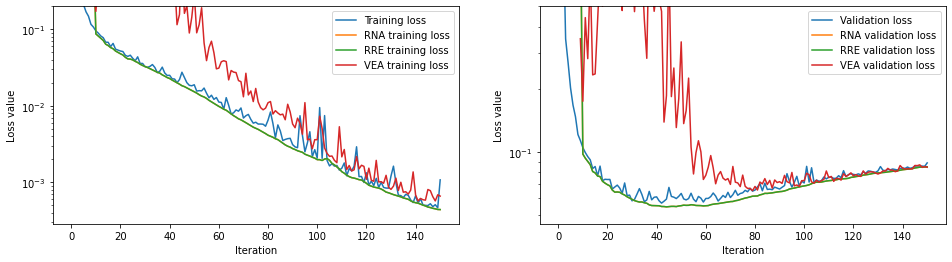

In [41]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
df[["Training loss", "RNA training loss", "RRE training loss", "VEA training loss"]].plot(ax=ax[0])
df[["Validation loss", "RNA validation loss", "RRE validation loss", "VEA validation loss"]].plot(ax=ax[1])
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel("Loss value")
    axis.set_yscale("log")
ax[0].set_ylim(None, 0.2)
ax[1].set_ylim(None, 0.5)
plt.savefig("figures/mnist-nns.png")

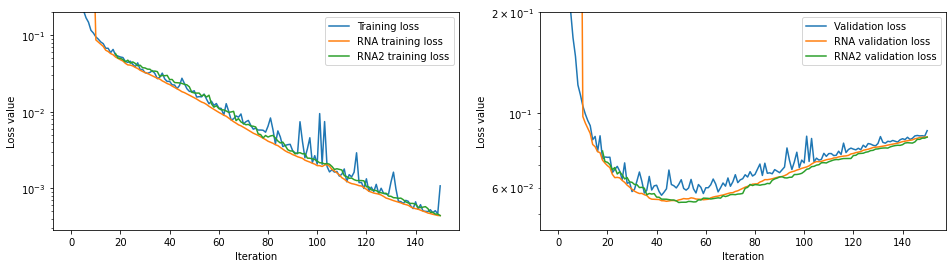

In [43]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4), facecolor="white")
df[["Training loss", "RNA training loss", "RNA2 training loss"]].plot(ax=ax[0])
df[["Validation loss", "RNA validation loss", "RNA2 validation loss"]].plot(ax=ax[1])
for axis in ax.ravel():
    axis.set_xlabel("Iteration")
    axis.set_ylabel("Loss value")
    axis.set_yscale("log")
ax[0].set_ylim(None, 0.2)
ax[1].set_ylim(None, 0.2)
plt.savefig("figures/mnist-nns-iter.png")